In [80]:
import pandas as pd
import numpy as np
import datetime 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy import stats
from scipy.stats import kde
%matplotlib inline 

# Loading the datasets for each user

In [2]:
user_1_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/1/1_Desktop_Keyboard.csv', header=0)
user_2_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/2/2_Desktop_Keyboard.csv', header=0)
user_3_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/3/3_Desktop_Keyboard.csv', header=0)
user_4_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/4/4_Desktop_Keyboard.csv', header=0)
user_5_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/5/5_Desktop_Keyboard.csv', header=0)
user_6_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/6/6_Desktop_Keyboard.csv', header=0)
user_7_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/7/7_Desktop_Keyboard.csv', header=0)
# user_8_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/8/8_Desktop_Keyboard.csv', header=0)
# user_9_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/9/9_Desktop_Keyboard.csv', header=0)
user_10_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/10/10_Desktop_Keyboard.csv', header=0)

In [94]:
user_1_desktop.head(10)

,EID,key,direction,time
0,0,t,0,2017-04-14 18:09:41.538
1,1,t,1,2017-04-14 18:09:41.679
2,2,i,0,2017-04-14 18:09:41.819
3,3,i,1,2017-04-14 18:09:42.006
4,4,BACKSPACE,0,2017-04-14 18:09:43.223
5,5,BACKSPACE,1,2017-04-14 18:09:43.379
6,6,BACKSPACE,0,2017-04-14 18:09:43.925
7,7,BACKSPACE,1,2017-04-14 18:09:44.097
8,8,t,0,2017-04-14 18:09:44.674
9,9,t,1,2017-04-14 18:09:44.830


In [3]:
#adding mddfnmdnmdnd
user_freetext_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_Freetext.csv', header=0)
key_distance = pd.read_excel('C:/Research Activities/Dataset/Keyboard_distance.xlsx')

In [4]:
user_freetext_desktop['timestamp'] = pd.to_datetime(user_freetext_desktop['timestamp'])
user_1_desktop['time'] = pd.to_datetime(user_1_desktop['time'])
user_2_desktop['time'] = pd.to_datetime(user_2_desktop['time'])
user_3_desktop['time'] = pd.to_datetime(user_3_desktop['time'])
user_4_desktop['time'] = pd.to_datetime(user_4_desktop['time'])
user_5_desktop['time'] = pd.to_datetime(user_5_desktop['time'])
user_6_desktop['time'] = pd.to_datetime(user_6_desktop['time'])
user_7_desktop['time'] = pd.to_datetime(user_7_desktop['time'])
# user_8_desktop['time'] = pd.to_datetime(user_8_desktop['time'])
# user_9_desktop['time'] = pd.to_datetime(user_9_desktop['time'])
user_10_desktop['time'] = pd.to_datetime(user_10_desktop['time'])

In [5]:
user1_freetext_timestamp_desktop = (user_freetext_desktop.iloc[0,1])
user2_freetext_timestamp_desktop = (user_freetext_desktop.iloc[1,1])
user3_freetext_timestamp_desktop = (user_freetext_desktop.iloc[2,1])
user4_freetext_timestamp_desktop = (user_freetext_desktop.iloc[3,1])
user5_freetext_timestamp_desktop = (user_freetext_desktop.iloc[4,1])
user6_freetext_timestamp_desktop = (user_freetext_desktop.iloc[5,1])
user7_freetext_timestamp_desktop = (user_freetext_desktop.iloc[6,1])
#user8_freetext_timestamp_desktop = (user_freetext_desktop.iloc[7,1]) no freetext timing
#user9_freetext_timestamp_desktop = (user_freetext_desktop.iloc[8,1]) no freetext timing
user10_freetext_timestamp_desktop = (user_freetext_desktop.iloc[7,1])

In [6]:
user_1_fixedtext_desktop = user_1_desktop[user_1_desktop["time"]< user1_freetext_timestamp_desktop]
user_1_freetext_desktop = user_1_desktop[user_1_desktop["time"]>= user1_freetext_timestamp_desktop]

user_2_fixedtext_desktop = user_2_desktop[user_2_desktop["time"]< user2_freetext_timestamp_desktop]
user_2_freetext_desktop = user_2_desktop[user_2_desktop["time"]>= user2_freetext_timestamp_desktop]

user_3_fixedtext_desktop = user_3_desktop[user_3_desktop["time"]< user3_freetext_timestamp_desktop]
user_3_freetext_desktop = user_3_desktop[user_3_desktop["time"]>= user3_freetext_timestamp_desktop]

user_4_fixedtext_desktop = user_4_desktop[user_4_desktop["time"]< user4_freetext_timestamp_desktop]
user_4_freetext_desktop = user_4_desktop[user_4_desktop["time"]>= user4_freetext_timestamp_desktop]

user_5_fixedtext_desktop = user_5_desktop[user_5_desktop["time"]< user5_freetext_timestamp_desktop]
user_5_freetext_desktop = user_5_desktop[user_5_desktop["time"]>= user5_freetext_timestamp_desktop]

user_6_fixedtext_desktop = user_6_desktop[user_6_desktop["time"]< user6_freetext_timestamp_desktop]
user_6_freetext_desktop = user_6_desktop[user_6_desktop["time"]>= user6_freetext_timestamp_desktop]

user_7_fixedtext_desktop = user_7_desktop[user_7_desktop["time"]< user7_freetext_timestamp_desktop]
user_7_freetext_desktop = user_7_desktop[user_7_desktop["time"]>= user7_freetext_timestamp_desktop]

#user_8_fixedtext_desktop = user_8_desktop[user_8_desktop["time"]< user8_freetext_timestamp_desktop]
# user_8_freetext_desktop = user_8_desktop[user_8_desktop["time"]>= user8_freetext_timestamp_desktop]

# user_9_fixedtext_desktop = user_9_desktop[user_9_desktop["time"]< user9_freetext_timestamp_desktop]
# user_9_freetext_desktop = user_9_desktop[user_9_desktop["time"]>= user9_freetext_timestamp_desktop]

user_10_fixedtext_desktop = user_10_desktop[user_10_desktop["time"]< user10_freetext_timestamp_desktop]
user_10_freetext_desktop = user_10_desktop[user_10_desktop["time"]>= user10_freetext_timestamp_desktop]

In [7]:
def get_timings_KIT(keys_in_pipeline, search_key, search_key_timing):
    mask = np.ones(len(keys_in_pipeline))
    keys_in_pipeline = np.asarray(keys_in_pipeline)
    for i, (key, timing) in enumerate(keys_in_pipeline):
          if(search_key==key):
            mask[i] = 0
            non_zero_indices = np.nonzero(mask) 

            if(len(non_zero_indices)>0):
                keys_in_pipeline = keys_in_pipeline[non_zero_indices]
            else:
                  keys_in_pipeline = []

            return keys_in_pipeline, timing, search_key_timing
    return keys_in_pipeline, None, None

# function to get KIT data frame with key, press_time, release_time for a given user
def get_dataframe_KIT(data):
    """ Input: data  Output: Dataframe with (key, press_time, release_time)""" 
    
    keys_in_pipeline = []
    result_key = []
    press = []
    release = []
    for row_idx in range(len(data)):
        keys_in_pipeline = list(keys_in_pipeline)
        curr_key = data[row_idx][1]
        curr_direction = data[row_idx][2]
        curr_timing = data[row_idx][3]

        if(curr_direction==0):
            keys_in_pipeline.append([curr_key, curr_timing])

        if(curr_direction==1):
            keys_in_pipeline, curr_start, curr_end = get_timings_KIT(keys_in_pipeline, curr_key, curr_timing)
            if(curr_start is None):
                continue
            else:
                result_key.append(curr_key)
                press.append(curr_start)
                release.append(curr_end)

    resultant_data_frame = pd.DataFrame(list(zip(result_key, press, release)),
               columns =['Key', 'Press_Time', 'Release_Time']) 
    return resultant_data_frame  

In [8]:
def get_DIG_features(data):
  
    result = [{'Keys': str(data[row_idx][0])+','+str(data[row_idx + 1][0]), 
               'Holdtime1': (((data[row_idx][2]-data[row_idx][1])).microseconds)/1000,
            'Holdtime2': (((data[row_idx + 1][2]-data[row_idx + 1][1])).microseconds)/1000,
               'F1': (((data[row_idx+1][1]-data[row_idx][2])).microseconds)/1000,
              'F2': (((data[row_idx+1][1]-data[row_idx][1])).microseconds)/1000,
              'F3': (((data[row_idx+1][2]-data[row_idx][2])).microseconds)/1000,
              'F4': (((data[row_idx+1][2]-data[row_idx][1])).microseconds)/1000} 
              for row_idx in range(0, len(data)) 
              if (row_idx + 1 < len(data))]
        
    df = pd.DataFrame(result)
    
    return df

In [9]:
df_desktop_user1_fixed = get_dataframe_KIT(user_1_fixedtext_desktop.values)
df_desktop_user1_free = get_dataframe_KIT(user_1_freetext_desktop.values)

df_desktop_user2_fixed = get_dataframe_KIT(user_2_fixedtext_desktop.values)
df_desktop_user2_free = get_dataframe_KIT(user_2_freetext_desktop.values)

df_desktop_user3_fixed = get_dataframe_KIT(user_3_fixedtext_desktop.values)
df_desktop_user3_free = get_dataframe_KIT(user_3_freetext_desktop.values)

df_desktop_user4_fixed = get_dataframe_KIT(user_4_fixedtext_desktop.values)
df_desktop_user4_free = get_dataframe_KIT(user_4_freetext_desktop.values)

df_desktop_user5_fixed = get_dataframe_KIT(user_5_fixedtext_desktop.values)
df_desktop_user5_free = get_dataframe_KIT(user_5_freetext_desktop.values)

df_desktop_user6_fixed = get_dataframe_KIT(user_6_fixedtext_desktop.values)
df_desktop_user6_free = get_dataframe_KIT(user_6_freetext_desktop.values)

df_desktop_user7_fixed = get_dataframe_KIT(user_7_fixedtext_desktop.values)
df_desktop_user7_free = get_dataframe_KIT(user_7_freetext_desktop.values)

# df_desktop_user8_fixed = get_dataframe_KIT(user_8_fixedtext_desktop.values)
# df_desktop_user8_free = get_dataframe_KIT(user_8_freetext_desktop.values)

# df_desktop_user9_fixed = get_dataframe_KIT(user_9_fixedtext_desktop.values)
# df_desktop_user9_free = get_dataframe_KIT(user_9_freetext_desktop.values)

df_desktop_user10_fixed = get_dataframe_KIT(user_10_fixedtext_desktop.values)
df_desktop_user10_free = get_dataframe_KIT(user_10_freetext_desktop.values)

In [10]:
df_desktop_user10_fixed.head(10)

,Key,Press_Time,Release_Time
0,t,2017-04-22 12:57:44.684,2017-04-22 12:57:45.527
1,h,2017-04-22 12:57:45.620,2017-04-22 12:57:45.730
2,i,2017-04-22 12:57:45.932,2017-04-22 12:57:45.995
3,s,2017-04-22 12:57:46.073,2017-04-22 12:57:46.135
4,SPACE,2017-04-22 12:57:46.198,2017-04-22 12:57:46.260
5,i,2017-04-22 12:57:46.322,2017-04-22 12:57:46.385
6,s,2017-04-22 12:57:46.463,2017-04-22 12:57:46.510
7,SPACE,2017-04-22 12:57:46.634,2017-04-22 12:57:46.697
8,a,2017-04-22 12:57:46.759,2017-04-22 12:57:46.822
9,SPACE,2017-04-22 12:57:46.884,2017-04-22 12:57:46.946


In [11]:
df_desktop_user1_fixed_features = get_DIG_features(df_desktop_user1_fixed.values)
df_desktop_user1_free_features = get_DIG_features(df_desktop_user1_free.values)

df_desktop_user2_fixed_features = get_DIG_features(df_desktop_user2_fixed.values)
df_desktop_user2_free_features = get_DIG_features(df_desktop_user2_free.values)

df_desktop_user3_fixed_features = get_DIG_features(df_desktop_user3_fixed.values)
df_desktop_user3_free_features = get_DIG_features(df_desktop_user3_free.values)

df_desktop_user4_fixed_features = get_DIG_features(df_desktop_user4_fixed.values)
df_desktop_user4_free_features = get_DIG_features(df_desktop_user4_free.values)

df_desktop_user5_fixed_features = get_DIG_features(df_desktop_user5_fixed.values)
df_desktop_user5_free_features = get_DIG_features(df_desktop_user5_free.values)

df_desktop_user6_fixed_features = get_DIG_features(df_desktop_user6_fixed.values)
df_desktop_user6_free_features = get_DIG_features(df_desktop_user6_free.values)

df_desktop_user7_fixed_features = get_DIG_features(df_desktop_user7_fixed.values)
df_desktop_user7_free_features = get_DIG_features(df_desktop_user7_free.values)

# df_desktop_user8_fixed_features = get_DIG_features(df_desktop_user8_fixed.values)
# df_desktop_user8_free_features = get_DIG_features(df_desktop_user8_free.values)

# df_desktop_user9_fixed_features = get_DIG_features(df_desktop_user9_fixed.values)
# df_desktop_user9_free_features = get_DIG_features(df_desktop_user9_free.values)

df_desktop_user10_fixed_features = get_DIG_features(df_desktop_user10_fixed.values)
df_desktop_user10_free_features = get_DIG_features(df_desktop_user10_free.values)

In [12]:
df_desktop_user10_free_features.head(30)

,Keys,Holdtime1,Holdtime2,F1,F2,F3,F4
0,"a,m",156.0,141.0,109.0,265.0,250.0,406.0
1,"m,a",141.0,265.0,312.0,453.0,577.0,718.0
2,"a,z",265.0,109.0,109.0,374.0,218.0,483.0
3,"z,o",109.0,94.0,203.0,312.0,297.0,406.0
4,"o,n",94.0,124.0,125.0,219.0,249.0,343.0
5,"n,.",124.0,156.0,858.0,982.0,14.0,138.0
6,".,c",156.0,63.0,156.0,312.0,219.0,375.0
7,"c,o",63.0,47.0,78.0,141.0,125.0,188.0
8,"o,m",47.0,140.0,62.0,109.0,202.0,249.0
9,"m,RETURN",140.0,94.0,312.0,452.0,406.0,546.0


In [13]:
df_combine_user1_fixed = df_desktop_user1_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_free = df_desktop_user1_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)

df_combine_user2_fixed = df_desktop_user2_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_free = df_desktop_user2_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)

df_combine_user3_fixed = df_desktop_user3_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user3_free = df_desktop_user3_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)

df_combine_user4_fixed = df_desktop_user4_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user4_free = df_desktop_user4_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)

df_combine_user5_fixed = df_desktop_user5_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user5_free = df_desktop_user5_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)

df_combine_user6_fixed = df_desktop_user6_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user6_free = df_desktop_user6_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)

df_combine_user7_fixed = df_desktop_user7_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user7_free = df_desktop_user7_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)

df_combine_user10_fixed = df_desktop_user10_fixed_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)
df_combine_user10_free = df_desktop_user10_free_features.join(key_distance.set_index('Keys'), on='Keys', how='inner').sort_index(axis=0, ascending=True)


In [14]:
df_combine_user10_free.head(20)

,Keys,Holdtime1,Holdtime2,F1,F2,F3,F4,Distance,Hands
0,"a,m",156.0,141.0,109.0,265.0,250.0,406.0,7,LR
1,"m,a",141.0,265.0,312.0,453.0,577.0,718.0,7,LR
2,"a,z",265.0,109.0,109.0,374.0,218.0,483.0,1,LL
3,"z,o",109.0,94.0,203.0,312.0,297.0,406.0,8,LR
4,"o,n",94.0,124.0,125.0,219.0,249.0,343.0,3,RR
7,"c,o",63.0,47.0,78.0,141.0,125.0,188.0,6,LR
8,"o,m",47.0,140.0,62.0,109.0,202.0,249.0,2,RR
11,"m,o",727.0,457.0,954.0,681.0,411.0,138.0,2,RR
12,"o,u",457.0,124.0,182.0,639.0,306.0,763.0,2,RR
13,"u,b",124.0,116.0,109.0,233.0,225.0,349.0,2,LR


In [86]:
df_user_1_fixed_distance_1 = df_combine_user1_fixed.loc[(df_combine_user1_fixed['Hands']!='LR') & (df_combine_user1_fixed['Distance']==1)] 
df_user_1_free_distance_1 = df_combine_user1_free.loc[(df_combine_user1_free['Distance']==1) & (df_combine_user1_free['Hands']!='LR')]

df_user_2_fixed_distance_1 = df_combine_user2_fixed.loc[(df_combine_user2_fixed['Distance']==1) & (df_combine_user2_fixed['Hands']!='LR')]
df_user_2_free_distance_1 = df_combine_user2_free.loc[(df_combine_user2_free['Distance']==1) & (df_combine_user2_free['Hands']!='LR')]

df_user_3_fixed_distance_1 = df_combine_user3_fixed.loc[(df_combine_user3_fixed['Distance']==1) & (df_combine_user3_fixed['Hands']!='LR')]
df_user_3_free_distance_1 = df_combine_user3_free.loc[(df_combine_user3_free['Distance']==1) & (df_combine_user3_free['Hands']!='LR')]

df_user_4_fixed_distance_1 = df_combine_user4_fixed.loc[(df_combine_user4_fixed['Distance']==1) & (df_combine_user4_fixed['Hands']!='LR')]
df_user_4_free_distance_1 = df_combine_user4_free.loc[(df_combine_user4_free['Distance']==1) & (df_combine_user4_free['Hands']!='LR')]

df_user_5_fixed_distance_1 = df_combine_user5_fixed.loc[(df_combine_user5_fixed['Distance']==1) & (df_combine_user5_fixed['Hands']!='LR')]
df_user_5_free_distance_1 = df_combine_user5_free.loc[(df_combine_user5_free['Distance']==1) & (df_combine_user5_free['Hands']!='LR')]

df_user_6_fixed_distance_1 = df_combine_user6_fixed.loc[(df_combine_user6_fixed['Distance']==1) & (df_combine_user6_fixed['Hands']!='LR')]
df_user_6_free_distance_1 = df_combine_user6_free.loc[(df_combine_user6_free['Distance']==1) & (df_combine_user6_free['Hands']!='LR')]

df_user_7_fixed_distance_1 = df_combine_user7_fixed.loc[(df_combine_user7_fixed['Distance']==1) & (df_combine_user7_fixed['Hands']!='LR')]
df_user_7_free_distance_1 = df_combine_user7_free.loc[(df_combine_user7_free['Distance']==1) & (df_combine_user7_free['Hands']!='LR')]

df_user_10_fixed_distance_1 = df_combine_user10_fixed.loc[(df_combine_user10_fixed['Distance']==1) & (df_combine_user10_fixed['Hands']!='LR')]
df_user_10_free_distance_1 = df_combine_user10_free.loc[(df_combine_user10_free['Distance']==1) & (df_combine_user10_free['Hands']!='LR')]


In [87]:
df_user_1_fixed_distance_2 = df_combine_user1_fixed.loc[(df_combine_user1_fixed['Distance']==2) & (df_combine_user1_fixed['Hands']!='LR')]
df_user_1_free_distance_2 = df_combine_user1_free.loc[(df_combine_user1_free['Distance']==2) & (df_combine_user1_free['Hands']!='LR')]

df_user_2_fixed_distance_2 = df_combine_user2_fixed.loc[(df_combine_user2_fixed['Distance']==2) & (df_combine_user2_fixed['Hands']!='LR')]
df_user_2_free_distance_2 = df_combine_user2_free.loc[(df_combine_user2_free['Distance']==2) & (df_combine_user2_free['Hands']!='LR')]

df_user_3_fixed_distance_2 = df_combine_user3_fixed.loc[(df_combine_user3_fixed['Distance']==2) & (df_combine_user3_fixed['Hands']!='LR')]
df_user_3_free_distance_2 = df_combine_user3_free.loc[(df_combine_user3_free['Distance']==2) & (df_combine_user3_free['Hands']!='LR')]

df_user_4_fixed_distance_2 = df_combine_user4_fixed.loc[(df_combine_user4_fixed['Distance']==2) & (df_combine_user4_fixed['Hands']!='LR')]
df_user_4_free_distance_2 = df_combine_user4_free.loc[(df_combine_user4_free['Distance']==2) & (df_combine_user4_free['Hands']!='LR')]

df_user_5_fixed_distance_2 = df_combine_user5_fixed.loc[(df_combine_user5_fixed['Distance']==2) & (df_combine_user5_fixed['Hands']!='LR')]
df_user_5_free_distance_2 = df_combine_user5_free.loc[(df_combine_user5_free['Distance']==2) & (df_combine_user5_free['Hands']!='LR')]

df_user_6_fixed_distance_2 = df_combine_user6_fixed.loc[(df_combine_user6_fixed['Distance']==2) & (df_combine_user6_fixed['Hands']!='LR')]
df_user_6_free_distance_2 = df_combine_user6_free.loc[(df_combine_user6_free['Distance']==2) & (df_combine_user6_free['Hands']!='LR')]

df_user_7_fixed_distance_2 = df_combine_user7_fixed.loc[(df_combine_user7_fixed['Distance']==2) & (df_combine_user7_fixed['Hands']!='LR')]
df_user_7_free_distance_2 = df_combine_user7_free.loc[(df_combine_user7_free['Distance']==2) & (df_combine_user7_free['Hands']!='LR')]

df_user_10_fixed_distance_2 = df_combine_user10_fixed.loc[(df_combine_user10_fixed['Distance']==2) & (df_combine_user10_fixed['Hands']!='LR')]
df_user_10_free_distance_2 = df_combine_user10_free.loc[(df_combine_user10_free['Distance']==2) & (df_combine_user10_free['Hands']!='LR')]


In [17]:
df_user_1_fixed_distance_3 = df_combine_user1_fixed.loc[(df_combine_user1_fixed['Distance']==3) & (df_combine_user1_fixed['Hands']!='LR')]
df_user_1_free_distance_3 = df_combine_user1_free.loc[(df_combine_user1_free['Distance']==3) & (df_combine_user1_free['Hands']!='LR')]

df_user_2_fixed_distance_3 = df_combine_user2_fixed.loc[(df_combine_user2_fixed['Distance']==3) & (df_combine_user2_fixed['Hands']!='LR')]
df_user_2_free_distance_3 = df_combine_user2_free.loc[(df_combine_user2_free['Distance']==3) & (df_combine_user2_free['Hands']!='LR')]

df_user_3_fixed_distance_3 = df_combine_user3_fixed.loc[(df_combine_user3_fixed['Distance']==3) & (df_combine_user3_fixed['Hands']!='LR')]
df_user_3_free_distance_3 = df_combine_user3_free.loc[(df_combine_user3_free['Distance']==3) & (df_combine_user3_free['Hands']!='LR')]


In [88]:
mixed_user_distance_1 = pd.concat([df_user_1_fixed_distance_1,df_user_2_fixed_distance_1, df_user_3_fixed_distance_1, df_user_4_fixed_distance_1, df_user_5_fixed_distance_1, df_user_6_fixed_distance_1, df_user_7_fixed_distance_1, df_user_10_fixed_distance_1], keys=['user1','user2','user3','user4','user5', 'user6', 'user7', 'user10']).reset_index()
mixed_user_distance_2 = pd.concat([df_user_1_fixed_distance_2,df_user_2_fixed_distance_2, df_user_3_fixed_distance_2, df_user_4_fixed_distance_2, df_user_5_fixed_distance_2, df_user_6_fixed_distance_2, df_user_7_fixed_distance_2, df_user_10_fixed_distance_2], keys=['user1','user2','user3','user4','user5', 'user6', 'user7', 'user10']).reset_index()


In [19]:
mixed_user_distance_1

,level_0,level_1,Keys,Holdtime1,Holdtime2,F1,F2,F3,F4,Distance,Hands
0,user1,15,"e,s",63.0,203.0,140.0,203.0,343.0,406.0,1,LL
1,user1,22,"s,e",156.0,109.0,156.0,312.0,265.0,421.0,1,LL
2,user1,35,"r,d",93.0,47.0,203.0,296.0,250.0,343.0,1,LL
3,user1,36,"d,s",47.0,140.0,156.0,203.0,296.0,343.0,1,LL
4,user1,52,"r,e",109.0,124.0,125.0,234.0,249.0,358.0,1,LL
...,...,...,...,...,...,...,...,...,...,...,...
1745,user5,2994,"a,s",171.0,140.0,938.0,109.0,78.0,249.0,1,LL
1746,user5,2995,"s,e",140.0,125.0,94.0,234.0,219.0,359.0,1,LL
1747,user5,3000,"s,e",125.0,234.0,125.0,250.0,359.0,484.0,1,LL
1748,user5,3001,"e,r",234.0,234.0,891.0,125.0,125.0,359.0,1,LL


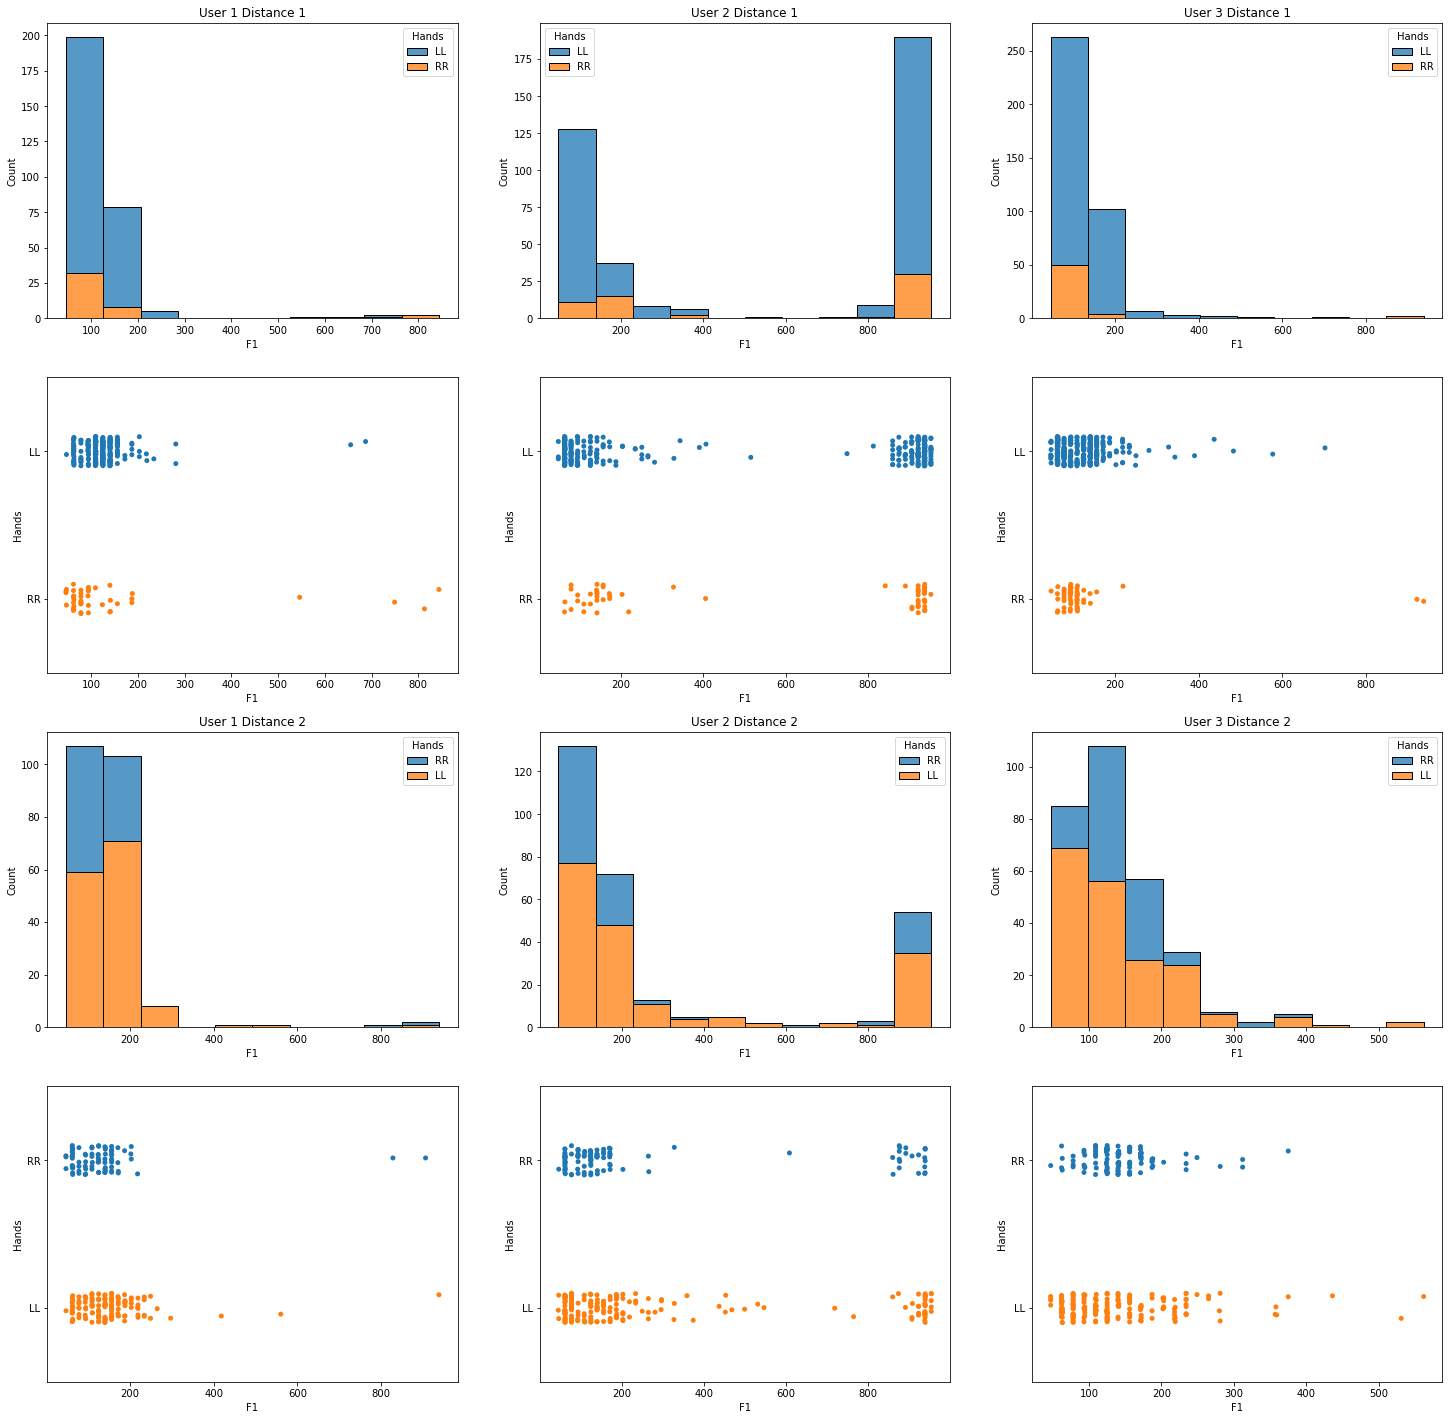

In [20]:
fig, axs = plt.subplots(ncols = 3, nrows =4, figsize = (25,25))
sns.histplot(data= df_user_1_fixed_distance_1, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[0][0])
axs[0][0].set_title("User 1 Distance 1")
sns.stripplot(data= df_user_1_fixed_distance_1, x='F1', y='Hands',ax=axs[1][0])
sns.histplot(data= df_user_2_fixed_distance_1, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[0][1])
axs[0][1].set_title("User 2 Distance 1")
sns.stripplot(data= df_user_2_fixed_distance_1, x='F1', y='Hands',ax=axs[1][1])
sns.histplot(data= df_user_3_fixed_distance_1, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[0][2])
axs[0][2].set_title("User 3 Distance 1")
sns.stripplot(data= df_user_3_fixed_distance_1, x='F1', y='Hands',ax=axs[1][2])

sns.histplot(data= df_user_1_fixed_distance_2, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[2][0])
axs[2][0].set_title("User 1 Distance 2")
sns.stripplot(data= df_user_1_fixed_distance_2, x='F1', y='Hands',ax=axs[3][0])
sns.histplot(data= df_user_2_fixed_distance_2, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[2][1])
axs[2][1].set_title("User 2 Distance 2")
sns.stripplot(data= df_user_2_fixed_distance_2, x='F1', y='Hands',ax=axs[3][1])
sns.histplot(data= df_user_3_fixed_distance_2, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[2][2])
axs[2][2].set_title("User 3 Distance 2")
sns.stripplot(data= df_user_3_fixed_distance_2, x='F1', y='Hands',ax=axs[3][2])

# sns.histplot(data= df_user_1_fixed_distance_3, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[4][0])
# sns.stripplot(data= df_user_1_fixed_distance_3, x='F1', y='Hands',ax=axs[5][0])
# sns.histplot(data= df_user_2_fixed_distance_3, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[4][1])
# sns.stripplot(data= df_user_2_fixed_distance_3, x='F1', y='Hands',ax=axs[5][1])
# sns.histplot(data= df_user_3_fixed_distance_3, x='F1', bins=10, hue='Hands', multiple="stack", ax=axs[4][2])
# sns.stripplot(data= df_user_3_fixed_distance_3, x='F1', y='Hands',ax=axs[5][2])

plt.show()

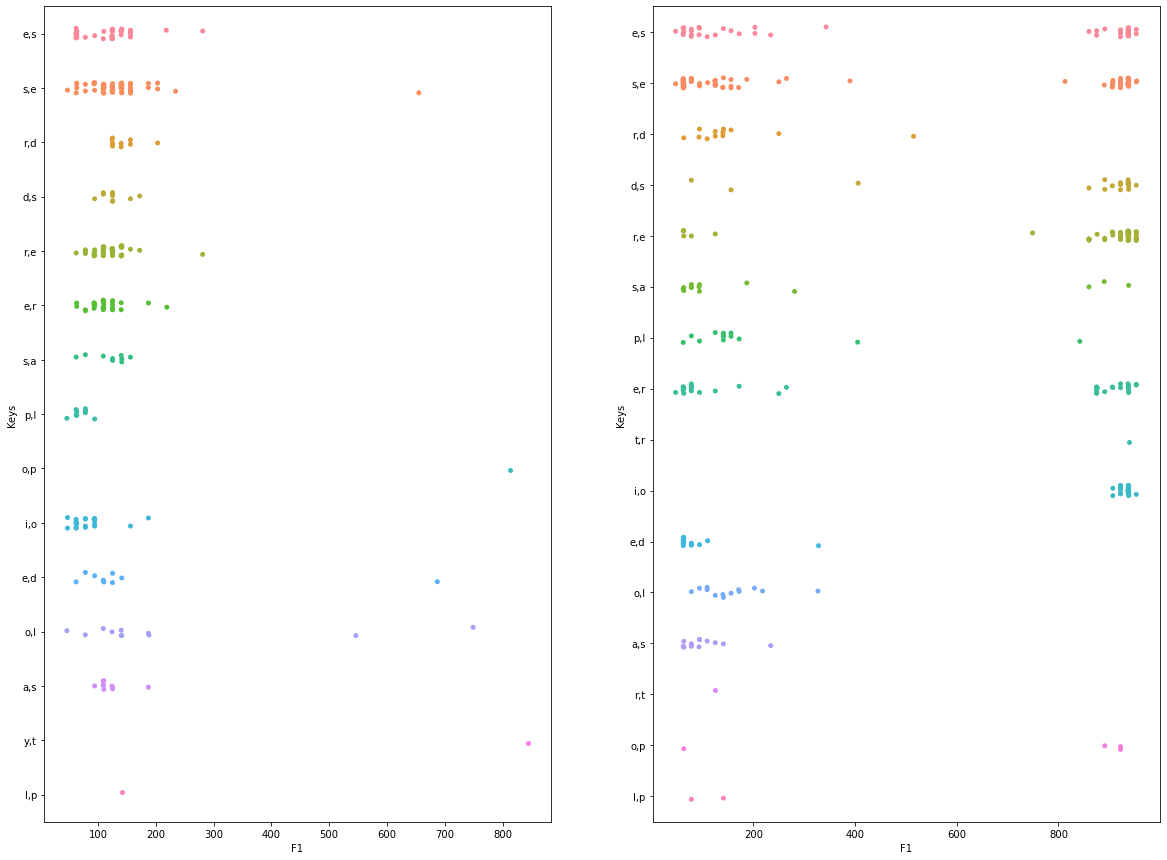

In [19]:
fig1, (ax1, ax2) = plt.subplots(ncols = 2, nrows =1, figsize = (20,15))
sns.stripplot(data= df_user_1_fixed_distance_1, x='F1', y='Keys', ax=ax1)
sns.stripplot(data= df_user_2_fixed_distance_1, x='F1', y='Keys', ax=ax2)
plt.show()

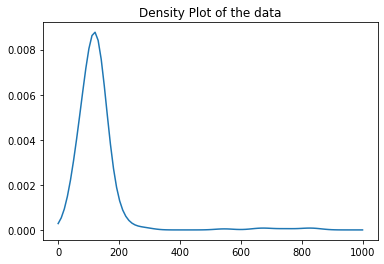

In [83]:
density = kde.gaussian_kde(df_user_1_fixed_distance_1['F1'])
x = np.linspace(0,1000,100)
y=density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.show()

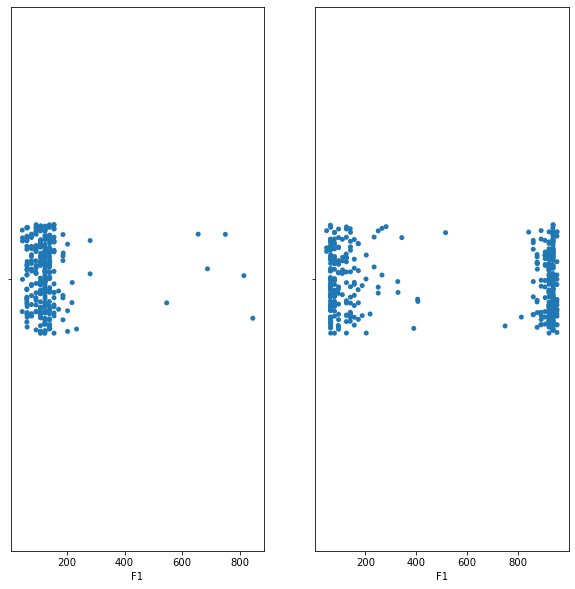

In [23]:
fig1, (ax1, ax2) = plt.subplots(ncols = 2, nrows =1, figsize = (10,10))
sns.stripplot(data= df_user_1_fixed_distance_1, x='F1', ax=ax1)
sns.stripplot(data= df_user_2_fixed_distance_1, x='F1', ax=ax2)
plt.show()

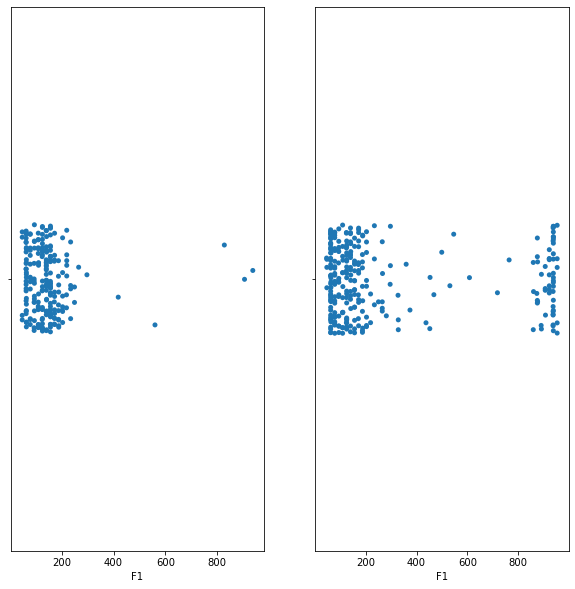

In [22]:
fig1, (ax1, ax2) = plt.subplots(ncols = 2, nrows =1, figsize = (10,10))
sns.stripplot(data= df_user_1_fixed_distance_2, x='F1', ax=ax1)
sns.stripplot(data= df_user_2_fixed_distance_2, x='F1', ax=ax2)
plt.show()

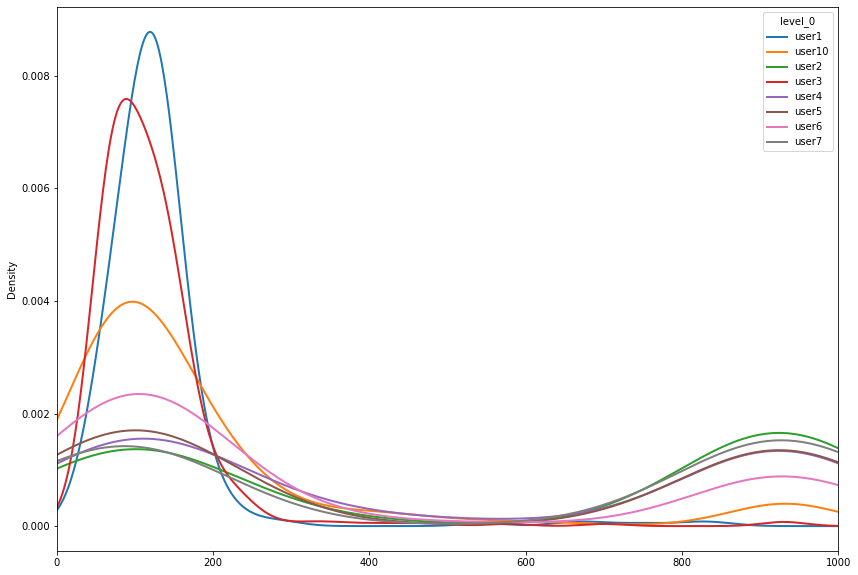

In [93]:
mixed_user_distance_1.pivot(columns='level_0', values='F1').plot.density(figsize=(14,10),xlim=(0,1000),linewidth=2)
plt.show()

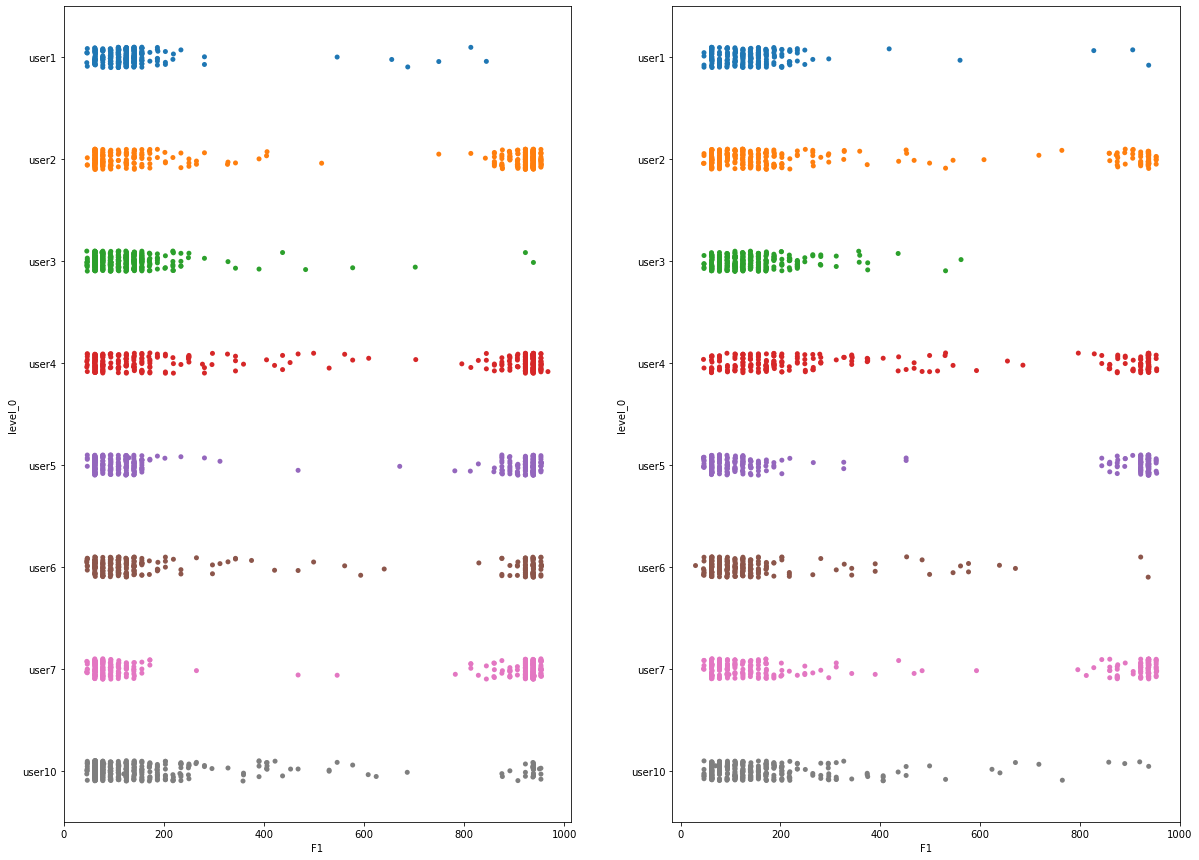

In [92]:
fig1, (ax1, ax2) = plt.subplots(ncols = 2, nrows =1, figsize = (20,15))
sns.stripplot(data= mixed_user_distance_1, x='F1',y='level_0',ax=ax1)
sns.stripplot(data= mixed_user_distance_2, x='F1',y='level_0',ax=ax2)
plt.show()

In [64]:
subset_user1 = df_user_1_fixed_distance_1.sample(frac=0.25, random_state=5)
subset_user2 = df_user_2_fixed_distance_1.sample(frac=0.25, random_state=5)
subset_user3 = df_user_3_fixed_distance_1.sample(frac=0.25, random_state=5)
subset_user4 = df_user_4_fixed_distance_1.sample(frac=0.25, random_state=5)
subset_user5 = df_user_5_fixed_distance_1.sample(frac=0.25, random_state=5)

In [65]:
stats.kruskal(subset_user1['F1'].values, subset_user2['F1'].values,subset_user3['F1'].values, subset_user4['F1'].values,
subset_user5['F1'].values)

KruskalResult(statistic=62.4494135114389, pvalue=8.860763210853439e-13)

In [74]:
print("User 1 VS User 2:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user2['F1'].values))))
print("User 1 VS User 3:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user3['F1'].values))))
print("User 1 VS User 4:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user4['F1'].values))))
print("User 1 VS User 5:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user5['F1'].values))))
print("User 2 VS User 3:"+str((stats.mannwhitneyu(subset_user2['F1'].values, subset_user3['F1'].values))))
print("User 2 VS User 4:"+str((stats.mannwhitneyu(subset_user2['F1'].values, subset_user4['F1'].values))))
print("User 2 VS User 5:"+str((stats.mannwhitneyu(subset_user2['F1'].values, subset_user5['F1'].values))))
print("User 3 VS User 4:"+str((stats.mannwhitneyu(subset_user3['F1'].values, subset_user4['F1'].values))))
print("User 3 VS User 5:"+str((stats.mannwhitneyu(subset_user3['F1'].values, subset_user5['F1'].values))))
print("User 4 VS User 5:"+str((stats.mannwhitneyu(subset_user4['F1'].values, subset_user5['F1'].values))))

User 1 VS User 2:MannwhitneyuResult(statistic=1854.0, pvalue=3.989938794023555e-07)
User 1 VS User 3:MannwhitneyuResult(statistic=3886.5, pvalue=0.13058471319788853)
User 1 VS User 4:MannwhitneyuResult(statistic=1661.0, pvalue=1.2123866168561e-06)
User 1 VS User 5:MannwhitneyuResult(statistic=2272.5, pvalue=0.00108420794152149)
User 2 VS User 3:MannwhitneyuResult(statistic=6794.5, pvalue=1.5998155960224466e-09)
User 2 VS User 4:MannwhitneyuResult(statistic=4168.5, pvalue=0.6058748382801946)
User 2 VS User 5:MannwhitneyuResult(statistic=4563.0, pvalue=0.42806061066545353)
User 3 VS User 4:MannwhitneyuResult(statistic=1948.0, pvalue=3.3420563776508314e-09)
User 3 VS User 5:MannwhitneyuResult(statistic=2614.0, pvalue=4.799772063148199e-06)
User 4 VS User 5:MannwhitneyuResult(statistic=3959.5, pvalue=0.5886566882277735)


In [56]:
stats.kruskal(subset_user1['F2'].values, subset_user2['F2'].values,subset_user3['F2'].values, subset_user4['F2'].values,
subset_user5['F2'].values)

KruskalResult(statistic=10.901331924297631, pvalue=0.027695576083360363)

In [57]:
stats.kruskal(subset_user1['F3'].values, subset_user2['F3'].values,subset_user3['F3'].values, subset_user4['F3'].values,
subset_user5['F3'].values)

KruskalResult(statistic=12.43873562596581, pvalue=0.014370174660518048)

In [58]:
stats.kruskal(subset_user1['F4'].values, subset_user2['F4'].values,subset_user3['F4'].values, subset_user4['F4'].values,
subset_user5['F4'].values)

KruskalResult(statistic=14.251503953216607, pvalue=0.006534145475218482)

In [52]:
subset_user1_dist1 = df_user_1_fixed_distance_1.sample(n=50, random_state=5)
subset_user1_dist2 = df_user_1_fixed_distance_2.sample(n=50, random_state=5)
subset_user1_dist3 = df_user_1_fixed_distance_3.sample(n=50, random_state=5)
#subset_user1_dist4 = df_user_1_fixed_distance_4.sample(frac=0.1)

In [53]:
stats.friedmanchisquare(subset_user1_dist1['F1'].values,subset_user1_dist2['F1'].values,subset_user1_dist3['F1'].values)

FriedmanchisquareResult(statistic=3.3439153439153104, pvalue=0.18787890012846478)

In [75]:
subset_user1 = df_user_1_fixed_distance_2.sample(frac=0.25, random_state=5)
subset_user2 = df_user_2_fixed_distance_2.sample(frac=0.25, random_state=5)
subset_user3 = df_user_3_fixed_distance_2.sample(frac=0.25, random_state=5)
subset_user4 = df_user_4_fixed_distance_2.sample(frac=0.25, random_state=5)
subset_user5 = df_user_5_fixed_distance_2.sample(frac=0.25, random_state=5)

In [76]:
stats.kruskal(subset_user1['F1'].values, subset_user2['F1'].values,subset_user3['F1'].values ,subset_user4['F1'].values,
            subset_user5['F1'].values)

KruskalResult(statistic=32.356264765223656, pvalue=1.6177161606350663e-06)

In [79]:
print("User 1 VS User 2:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user2['F1'].values))))
print("User 1 VS User 3:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user3['F1'].values))))
print("User 1 VS User 4:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user4['F1'].values))))
print("User 1 VS User 5:"+str((stats.mannwhitneyu(subset_user1['F1'].values, subset_user5['F1'].values))))
print("User 2 VS User 3:"+str((stats.mannwhitneyu(subset_user2['F1'].values, subset_user3['F1'].values))))
print("User 2 VS User 4:"+str((stats.mannwhitneyu(subset_user2['F1'].values, subset_user4['F1'].values))))
print("User 2 VS User 5:"+str((stats.mannwhitneyu(subset_user2['F1'].values, subset_user5['F1'].values))))
print("User 3 VS User 4:"+str((stats.mannwhitneyu(subset_user3['F1'].values, subset_user4['F1'].values))))
print("User 3 VS User 5:"+str((stats.mannwhitneyu(subset_user3['F1'].values, subset_user5['F1'].values))))
print("User 4 VS User 5:"+str((stats.mannwhitneyu(subset_user4['F1'].values, subset_user5['F1'].values))))

User 1 VS User 2:MannwhitneyuResult(statistic=1704.0, pvalue=0.13318589729418265)
User 1 VS User 3:MannwhitneyuResult(statistic=1889.5, pvalue=0.3902637091178307)
User 1 VS User 4:MannwhitneyuResult(statistic=802.0, pvalue=4.668821041116375e-07)
User 1 VS User 5:MannwhitneyuResult(statistic=1467.5, pvalue=0.006072450153644651)
User 2 VS User 3:MannwhitneyuResult(statistic=2857.5, pvalue=0.44879789026404504)
User 2 VS User 4:MannwhitneyuResult(statistic=1471.5, pvalue=0.0006786475553570733)
User 2 VS User 5:MannwhitneyuResult(statistic=2199.0, pvalue=0.08913317171895306)
User 3 VS User 4:MannwhitneyuResult(statistic=1113.5, pvalue=2.370999079131167e-07)
User 3 VS User 5:MannwhitneyuResult(statistic=2110.5, pvalue=0.021965619668916265)
User 4 VS User 5:MannwhitneyuResult(statistic=2550.5, pvalue=0.2039526673823302)


In [77]:
stats.kruskal(subset_user1['F2'].values, subset_user2['F2'].values,subset_user3['F2'].values ,subset_user4['F2'].values,
            subset_user5['F2'].values)

KruskalResult(statistic=14.16973303449206, pvalue=0.006772584316290766)

In [78]:
stats.kruskal(subset_user1['F3'].values, subset_user2['F3'].values,subset_user3['F3'].values ,subset_user4['F3'].values,
            subset_user5['F3'].values)

KruskalResult(statistic=19.03346273350449, pvalue=0.0007741352838556889)

In [51]:
stats.kruskal(subset_user1['F4'].values, subset_user2['F4'].values,subset_user3['F4'].values ,subset_user4['F4'].values,
            subset_user5['F4'].values)

KruskalResult(statistic=13.224509389362762, pvalue=0.010229339294674107)